In [128]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from numba import njit
from matplotlib import colors
import seaborn as sns
from scipy.special import iv
plt.style.use("seaborn-bright")
from numpy.random import random as rng
from numpy import sqrt, pi, exp, log, sin, cos, arange, linspace, zeros, ones
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import correlate, correlation_lags
plt.rcParams["lines.markerfacecolor"] = "none"
plt.rcParams['axes.xmargin'] = 0.1
plt.rcParams['axes.ymargin'] = 0.1
from matplotlib.pyplot import xlabel, ylabel, savefig, show, tight_layout, title, plot, scatter
from matplotlib.pyplot import hist, loglog, semilogy, semilogx, plot, show, legend, axhline
from matplotlib.pyplot import xlim, ylim, gca
from mpl_toolkits.mplot3d import Axes3D
from numpy import vectorize, loadtxt
import pandas as pd

In [2]:
word = 't=100'
filename = r"C:\Users\andriy\Desktop\monomers\N\1600\samples\1\ovito.xyz"
with open(filename, 'r') as fp:
    # read all lines in a list
    lines = fp.readlines()
    for line in lines:
        # check if string present on a current line
        if line.find(word) != -1:
            print(word, 'string exists in file')
            print('Line Number:', lines.index(line))
            print('Line:', line)

t=100 string exists in file
Line Number: 16020001
Line: Lattice="73 0.0 0.0 0.0 73 0.0 0.0 0.0 0.0" Origin="0 0 0.0" Properties=pos:R:2:Radius:R:1:Type:S:1:Identifier:I:1:Pressure:R:1 t=100



In [3]:
df = pd.read_csv(filename, sep="\t", skiprows=16020002,
                 names=["x", "y", "r", "t", "i", "p"], index_col=False)

In [7]:
df.head()

,x,y,r,t,i,p
0,-0.917853,1.30120,0.5,3,0,0.012573
1,0.912705,1.08292,0.5,3,1,0.884717
2,-4.433360,6.90192,0.5,3,2,0.252317
3,3.559460,6.11840,0.5,3,3,0.588062
4,2.641580,8.68478,0.5,3,4,8.236060


In [19]:
df.tail()

,x,y,r,t,i,p
1595,75.2506,63.7584,0.5,3,1595,1.177550
1596,73.0730,64.9926,0.5,3,1596,0.258556
1597,67.7119,68.2435,0.5,3,1597,0.385839
1598,77.9106,76.4187,0.5,3,1598,2.570300
1599,70.0534,72.3313,0.5,3,1599,0.000000


In [25]:
x = df["x"].values
y = df["y"].values

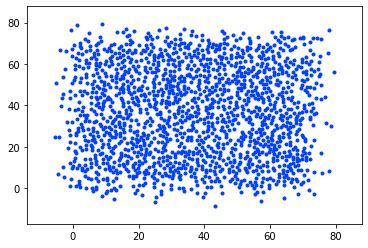

In [26]:
plot(x, y, ".", mfc="C0")

In [121]:
def gr(switch, npart, ngr, nhis, box, delg, rho, g, arr_r):
    """
    Radial distribution function
    @In switch - 0 initialization, 1 sample, 2 results
    """
    # TODO .py file and args
    if switch==0:
        npart = len(x)
        ngr = 0
        nhis = 1000 # Total number of bins
        box = 73
        delg = box / (2*nhis) # Bin size
        rho = npart / (box*box)
        g = zeros(nhis)
        arr_r = zeros(nhis)
    elif switch==1:
        ngr += 1
        for i in range(npart):
            for j in range(i+1, npart):
                xr = x[i] - x[j]
                yr = y[i] - y[j]
                xr -= box*round(xr/box)
                yr -= box*round(yr/box)
                r = sqrt(xr**2 + yr**2)
                if r < box/2:
                    ig = int(r/delg)
                    g[ig] += 2
    elif switch==2:
        for i in range(nhis):
            r = delg * (i+0.5) # Distance r
            arr_r[i] = r
            vb =  delg * r # Volume between bin i+i and i
            nid = 2 * pi * vb * rho # Number of ideal gas part, in vb
            #print(npart, nid, ngr)
            g[i] /= (ngr * npart * nid) # Normalize g(r)
    #print(npart, ngr, nhis, box, delg, rho, g, arr_r)
    return npart, ngr, nhis, box, delg, rho, g, arr_r

In [122]:
# Init
npart = None 
ngr = None 
nhis = None 
box = None 
delg = None 
rho = None 
g = None 
arr_r = None 

# Get gr
npart, ngr, nhis, box, delg, rho, g, arr_r = gr(0, npart, ngr, nhis, box, delg, rho, g, arr_r)
npart, ngr, nhis, box, delg, rho, g, arr_r = gr(1, npart, ngr, nhis, box, delg, rho, g, arr_r)
npart, ngr, nhis, box, delg, rho, g, arr_r = gr(2, npart, ngr, nhis, box, delg, rho, g, arr_r)

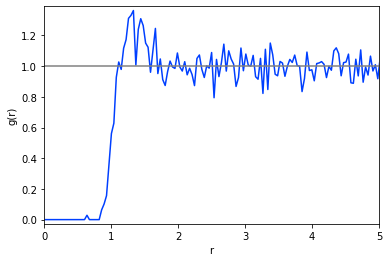

In [138]:
plot(arr_r, g, "-")
ylabel("g(r)")
xlabel("r")
ax = gca()
ax.margins(0.02)
xlim(0, 5)
plot(arr_r, ones(len(arr_r)), c="grey")
#savefig("gr.jpg", bbox_inches="tight", dpi=200)